# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [201]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [442]:
df = sns.load_dataset('penguins')

In [405]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

Question: in your own words:

describe each feature
mention its type (numeric or categorical)
write its name in Arabic
Note: use a Markdown cell.



1- species(categorical): it's explain the penguin types {Chinstrap, Adélie, or Gentoo}

2- culmen_length_mm(numeric): culmen length (mm)

3- culmen_depth_mm(numeric): culmen depth (mm)

4- flipper_length_mm(numeric): flipper length (mm)

5- body_mass_g(numeric): body mass (g)

6- island(categorical): island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

7- sex(categorical): penguin sex



Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [215]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [42]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [44]:
df.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [46]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

**Calculate count and percentage of missing values before handling them**

In [407]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [409]:
# Count missing values in each column
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values in each column
total_entries = len(df)
missing_values_percentage = (missing_values_count / total_entries) * 100

# Combine the results into a DataFrame for better visualization
missing_values_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Percentage': missing_values_percentage
})

print(missing_values_summary)

                   Missing Count  Percentage
species                        0    0.000000
island                         0    0.000000
bill_length_mm                 2    0.581395
bill_depth_mm                  2    0.581395
flipper_length_mm              2    0.581395
body_mass_g                    2    0.581395
sex                           11    3.197674


In [411]:
# Calculate the percentage of missing values in entire dataset
missing_values_precentage_befoure = (df.isnull().mean().mean() *100)
print(missing_values_precentage_befoure)

0.7890365448504983


In [426]:
df_clean = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

In [428]:
df_clean= df['bill_depth_mm'].fillna(df['bill_length_mm'].mean())

In [430]:
df_clean= df['flipper_length_mm'].fillna(df['bill_length_mm'].mean())

In [432]:
df_clean= df['body_mass_g'].fillna(df['bill_length_mm'].mean())

In [434]:
df_clean= df.dropna(subset=['sex'])

**Calculate the percentage of data loss after cleaning**

In [436]:
df_clean.shape

(333, 7)

In [438]:
df_clean.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [462]:
# Percentage of data loss
data_loss_percentage = ( (len(df) - len(df_clean) ) / len(df)) * 100
print("Percentage of data loss after cleaning:\n", data_loss_percentage)


Percentage of data loss after cleaning: 3.1976744186046515


In [466]:
df_clean.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


To handel the missing value in the dataset:

1- Fill missing values{beacuse its small numbers so i will filled insted of other sulotion}

2- Drop the column{i have 11 missing value so i drop the column}

**Check and handle duplicated rows**

In [468]:
df_clean.duplicated().sum()

0

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [471]:
mem_usage_before = df_clean.memory_usage(deep=True)

In [473]:
# convert categotical types
df_clean['species'] = df_clean['species'].astype('category')
df_clean['island'] = df_clean['island'].astype('category')
df_clean['sex'] = df_clean['sex'].astype('category')

In [475]:
# convert numerical types
df_clean['bill_length_mm'] = df_clean['bill_length_mm'].astype('float32')
df_clean['bill_depth_mm'] = df_clean['bill_depth_mm'].astype('float32')
df_clean['flipper_length_mm'] = df_clean['flipper_length_mm'].astype('float32')
df_clean['body_mass_g'] = df_clean['body_mass_g'].astype('float32')

Calculate memory saved after type conversion

In [478]:
mem_usage_after = df_clean.memory_usage(deep=True)

In [480]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 57 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [482]:
df_clean['sex'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [484]:
df_clean['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [488]:
df_nums=df_clean.select_dtypes('float32')
df_cat=df_clean.select_dtypes('category')

In [490]:
df_nums.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468669,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015767,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


In [492]:
df_cat.describe().T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

In [495]:
df_clean['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='species'>

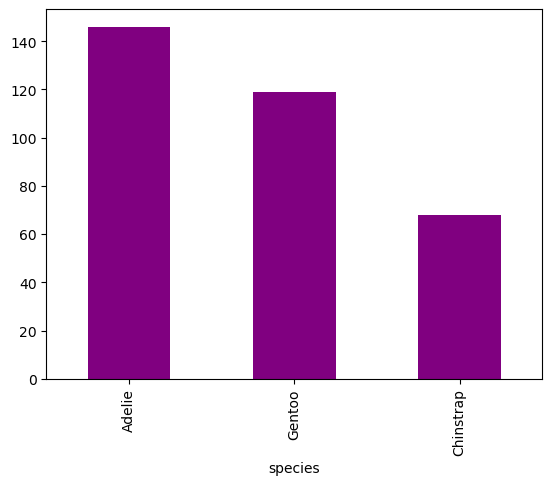

In [497]:
df_clean['species'].value_counts().plot(kind='bar', color='purple')

In [499]:
df_clean['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

<Axes: ylabel='count'>

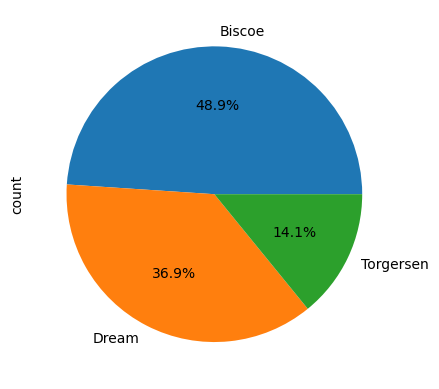

In [501]:
df_clean['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [503]:
df_clean['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

<Axes: ylabel='sex'>

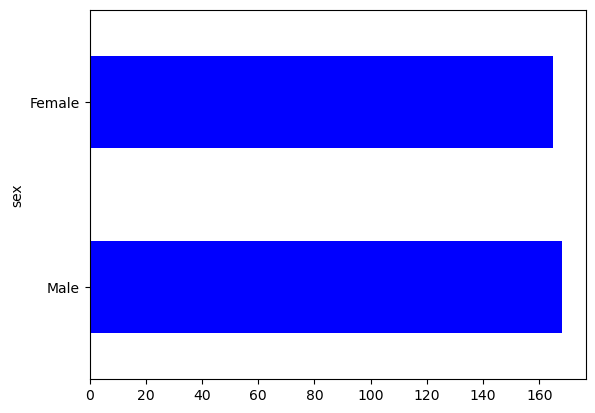

In [505]:
df_clean['sex'].value_counts().plot(kind='barh', color='blue')

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<Axes: ylabel='bill_length_mm'>

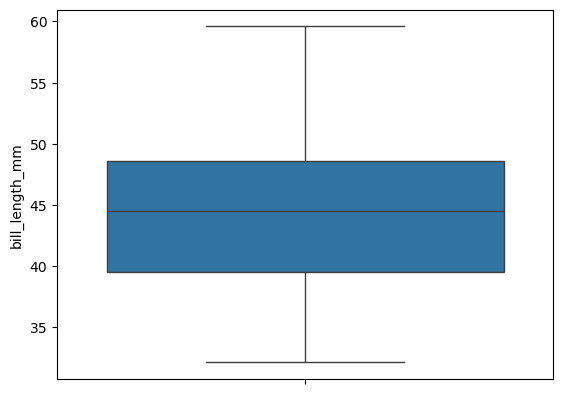

In [508]:
sns.boxplot(df_clean['bill_length_mm'])

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

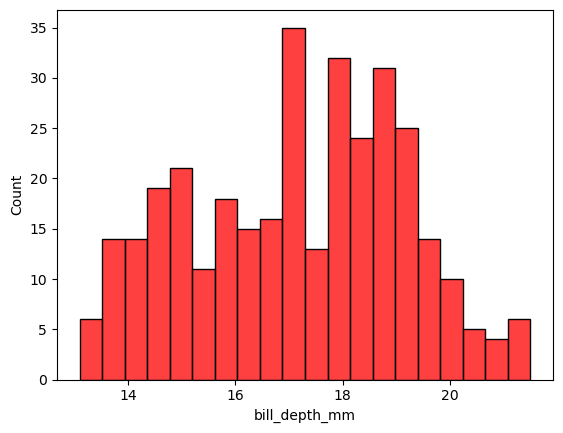

In [510]:
sns.histplot(df_clean['bill_depth_mm'], bins=20, color='red')

<Axes: ylabel='flipper_length_mm'>

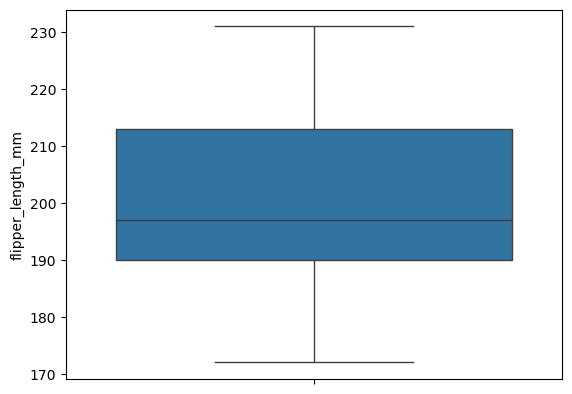

In [512]:
sns.boxplot(df_clean['flipper_length_mm'])

<Axes: xlabel='body_mass_g', ylabel='Count'>

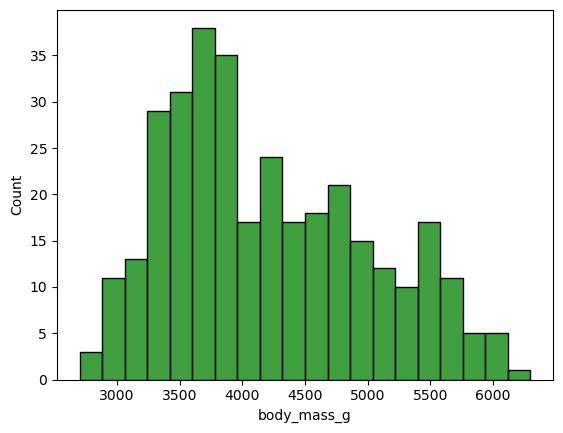

In [514]:
sns.histplot(df_clean['body_mass_g'], bins=20, color='green')

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

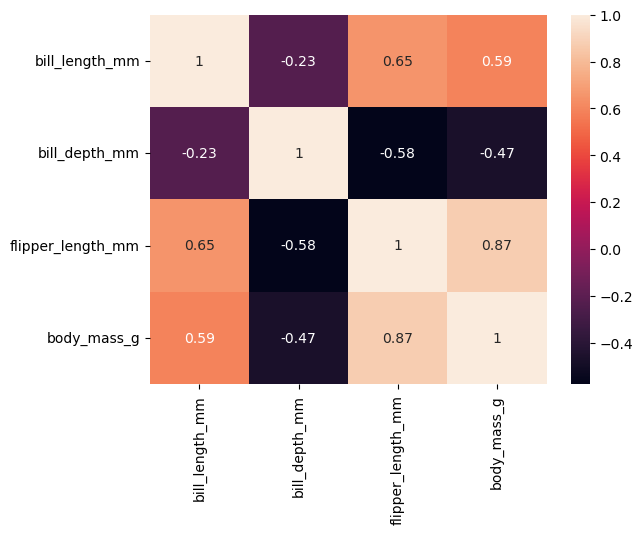

In [518]:
c = df_nums.corr()

sns.heatmap(c, annot=True) 

plt.show() 

**Write down your observations based on the correlation heatmap.**

# Observations:

- **From the penguin types that i see Adélie and it's the most frequent one in my dataset against the other types Chinstrap, or Gentoo.**
- **The penguins comes from different islands, 14.1% come from Torgersen, and 36.9% Dream, and 48.9% Biscoe.**
- **Male penguins are more numerous than female penguins, but not by much, as males are 3 times more numerous and are almost equal in terms of penguin sex.**
- **As i see most of the penguin have bill length in between (40 - 55 mm), Also the flipper length between (190 - 212 mm).**
- **The bill depth of most penguins is about 17.3 mm. The body mass of most penguins is also about 3600 g.**
- ** There is a srong realtionship between (body mass , flipper length) as you see in the correlation matrix, 

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [523]:
df_nums['bill_size'] = df_nums['bill_length_mm'] * df_nums['bill_depth_mm']
df_nums['bill_ratio'] = df_nums['bill_length_mm'] / df_nums['bill_depth_mm']

In [525]:
df_nums.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
0,39.099998,18.700001,181.0,3750.0,731.169983,2.090909
1,39.500000,17.400000,186.0,3800.0,687.299988,2.270115
2,40.299999,18.000000,195.0,3250.0,725.399963,2.238889
4,36.700001,19.299999,193.0,3450.0,708.309998,1.901554
5,39.299999,20.600000,190.0,3650.0,809.580017,1.907767
6,38.900002,17.799999,181.0,3625.0,692.419983,2.185393
7,39.200001,19.600000,195.0,4675.0,768.320007,2.000000
12,41.099998,17.600000,182.0,3200.0,723.359985,2.335227
13,38.599998,21.200001,191.0,3800.0,818.320007,1.820755
14,34.599998,21.100000,198.0,4400.0,730.059998,1.639810


Let's look at the correlation to see whether the newly created features are better.

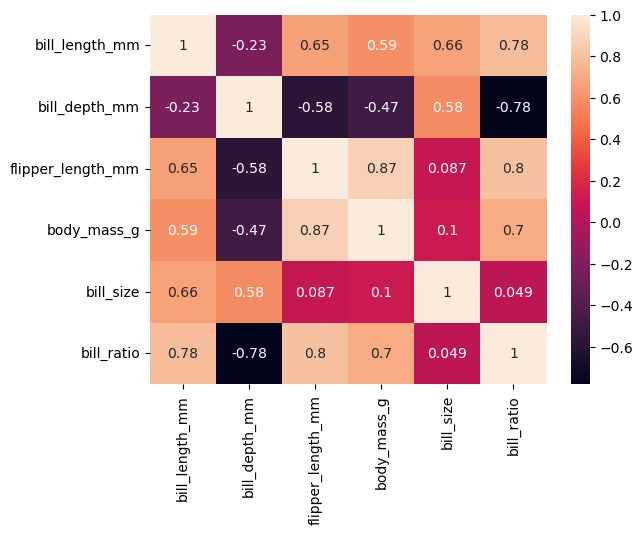

In [528]:
df_nums.corr()

sns.heatmap(df_nums.corr(), annot=True) 

plt.show() 

<Axes: >

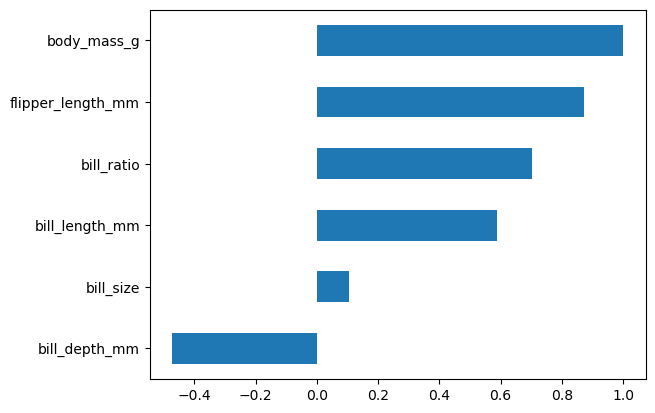

In [530]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
#corr['body_mass_g'].sort_values().plot.barh()
c=df_nums.corr()
c['body_mass_g'].sort_values().plot.barh()